## Euler Method 

the ode is 
$$ \dfrac{dx}{dt} = -xt $$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

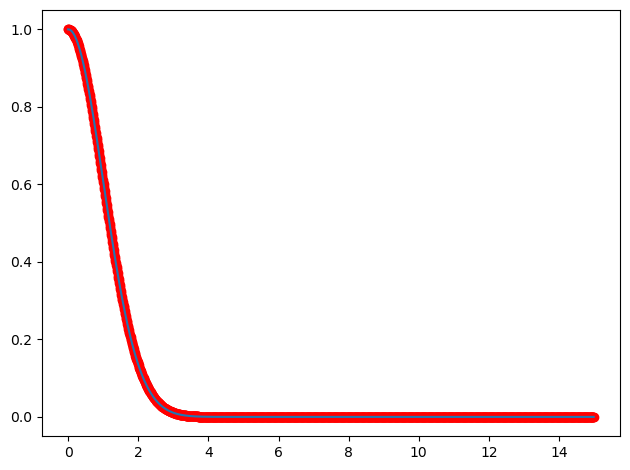

In [73]:

t_i = 0
t_f = 15

x_in = 1

h = 0.01


def dxdt(t,x):
    return  -x*t

def euler(f,t_i,t_f,x_in,h):
    ts = np.arange(t_i,t_f,h)
    xs = np.zeros_like(ts)
    
    xs[0] = x_in
    
    for i,tn in enumerate(ts[:-1]):  # so that last term count is not needed
        xs[i+1] = xs[i] + h*dxdt(tn,xs[i])   
    return ts,xs

ts_e = euler(dxdt,t_i,t_f,x_in,h)[0]
xs_e = euler(dxdt,t_i,t_f,x_in,h)[1]





def midpoint(f,t_i,t_f,x_in,h):
    ts = np.arange(t_i,t_f,h)
    xs = np.zeros_like(ts)
    
    xs[0] = x_in
    
    for i,tn in enumerate(ts[:-1]):
        xs_half = xs[i] + 0.5*h*dxdt(tn,xs[i])
        xs[i+1] = xs[i] + h*dxdt(tn+ h/2 , xs_half)
        
    return ts,xs

ts_m = midpoint(dxdt,0,15,1,0.01)[0]
xs_m = midpoint(dxdt,0,15,1,0.01)[1]


plt.plot(ts_e,xs_e)
plt.scatter(ts_m,xs_m,c='r')
plt.tight_layout()


##  second order ode

second order ode
$$ \dfrac{d^2y}{dt^2} = -4\pi^2y $$

$$  \dfrac{dy}{dt} = p    \hspace{1cm} \dfrac{dp}{dt} = -4\pi^2y $$

## euler 2nd order 

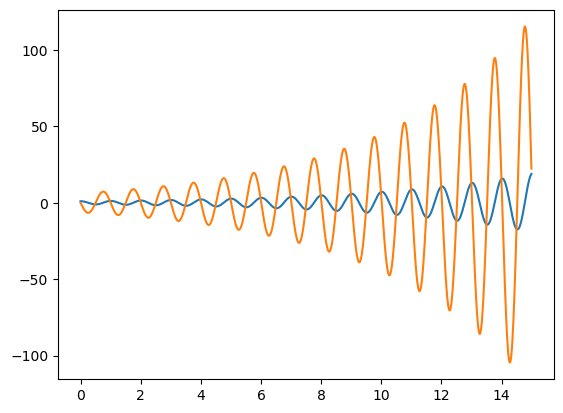

In [76]:
def slope(ys,t):
    return np.asarray([ys[1] , -4*np.pi**2*ys[0]])

def euler(f,t_i,t_f,y_in,h):
    
    ts = np.arange(t_i,t_f,h)
    ys = np.zeros((len(ts),len(y_in)))
    
    ys[0]=y_in
    
    for i,tn in enumerate(ts[:-1]):
        ys[i+1] = ys[i] + h*f(ys[i],tn)
        
    return ts,ys
    
    
ts, ys = euler(slope, 0, 15,[1,0], 0.01)


pos = ys[:,0]
vel = ys[:,1]

plt.plot(ts,pos)
plt.plot(ts,vel)




## Midpoint 2nd order 

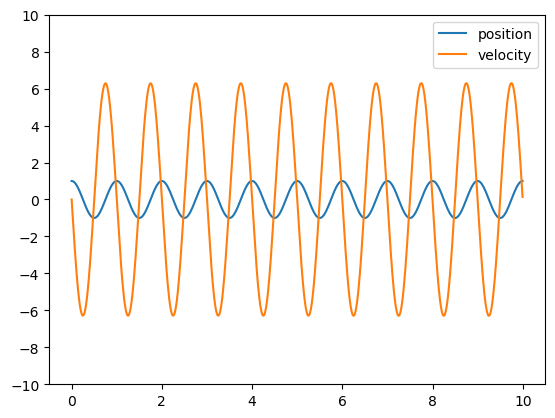

[[ 1.          0.        ]
 [ 0.99802608 -0.39478418]
 [ 0.99210821 -0.78800981]
 ...
 [ 0.99109019  0.92412956]
 [ 0.99837515  0.53103868]
 [ 1.00171482  0.13584774]]


In [99]:
def slope(ys,t):
    return np.asarray([ys[1] , -4*np.pi**2*ys[0]])

def midpoint(f,t_i,t_f,y_in,h):
    
    ts = np.arange(t_i,t_f,h)
    ys = np.zeros((len(ts),len(y_in)))
    
    ys[0]=y_in
    
    for i,tn in enumerate(ts[:-1]):
        ys_half = ys[i] + 0.5*h*slope(ys[i],tn)
        ys[i+1] = ys[i] + h*f( ys_half,tn+ h/2 )
        
    return ts,ys
    
    
ts, ys = midpoint(slope, 0, 10, [1, 0], 0.01)


pos = ys[:,0]
vel = ys[:,1]

plt.plot(ts,pos,label="position")
plt.plot(ts,vel,label="velocity")
plt.ylim(-10,10)
plt.yticks(np.arange(-10,11,2))
plt.legend()
plt.show()

print(ys)

## range kutta 2nd order 

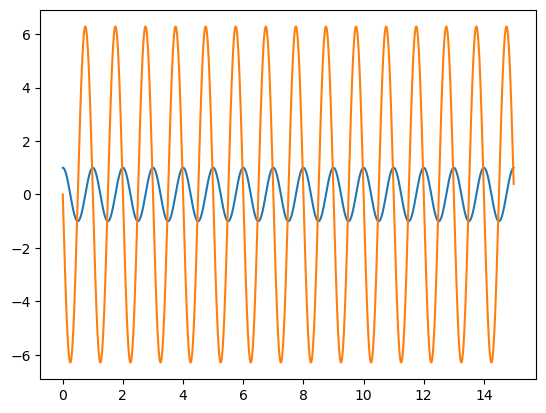

In [101]:
def rk4(f,t_i,t_f,y_in,h):
    ts = np.arange(t_i,t_f,h)
    ys = np.zeros((len(ts),len(y_in)))
    
    ys[0] = y_in
    
    for i,tn in enumerate(ts[:-1]):
        k1 = h*f(ys[i],tn)
        k2 = h*f(ys[i] + k1/2 , tn + h/2 )
        k3 = h*f(ys[i] + k2/2 , tn + h/2 )
        k4 = h*f(ys[i] + k3 , tn + h)
        ys[i+1] = ys[i] + (k1 +2*k2 + 2*k3 + k4)/6
        
        
    return ts,ys


ts,ys = rk4(slope,0,15,[1,0],0.01)

pos = ys[:,0]
vel = ys[:,1]

plt.plot(ts,pos)
plt.plot(ts,vel)
        